In [1]:
from __future__ import print_function
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
from keras.layers import Reshape, Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, UpSampling2D
from keras.models import Sequential
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,5)
import os
import random
import pandas as pd
from scipy.misc import imread,imshow

In [3]:
root_dir = os.path.abspath('.')
data_dir = 'C:/Users/Mayukha/Desktop/Data Science/Age of Indian Actors/data'

train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

In [4]:
i = random.choice(train.index)
img_name = train.ID[i]
img = imread(os.path.join(data_dir, 'Train', img_name))
print("age:",train.Class[i])

age: MIDDLE


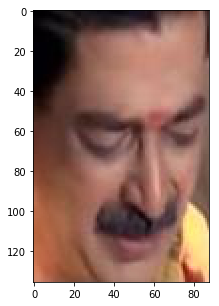

In [5]:
plt.imshow(np.uint8(img))
plt.show()

In [91]:
train.groupby(by = "Class").count()

,ID
Class,
MIDDLE,10804
OLD,2396
YOUNG,6706


In [7]:
from scipy.misc import imresize
temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img,(32,32))
    img = img.astype('float32')
    temp.append(img)
train_x = np.stack(temp)

In [10]:
temp_test = []
for img_name_test in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name_test)
    img = imread(img_path)
    img = imresize(img,(32,32))
    img = img.astype('float32')
    temp_test.append(img)
test_x = np.stack(temp_test)

In [11]:
train_x = train_x/255
test_x = test_x/255

In [12]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [13]:
from sklearn.preprocessing import LabelEncoder
import keras
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [97]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), strides=(1,1), activation='relu', padding='valid', input_shape=(32, 32, 3)))
    BatchNormalization()
    model.add(Conv2D(32,(3,3),activation='relu'))
    BatchNormalization()
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(64, (3,3), strides=(1,1), activation='relu', padding='valid'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(64, (3,3), strides=(1,1), activation='relu', padding='valid'))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return(model)

In [104]:
z = Sequential([
        BatchNormalization(input_shape = (32,32,3)),
        Conv2D(32,(3,3), activation='relu'),
        BatchNormalization(),
        Conv2D(32,(3,3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(),
        Conv2D(64,(3,3), activation='relu'),
        BatchNormalization(),
        Conv2D(64,(3,3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(3, activation='softmax')
        ])
z.compile(optimizer = 'nadam' , loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
z = create_model()

In [16]:
train_x.shape

(19906, 32, 32, 3)

In [105]:
z.fit(train_x, train_y,epochs=5,verbose=1, validation_split=0.1)

Train on 17915 samples, validate on 1991 samples
Epoch 1/5
17915/17915 [==============================] - 214s - loss: 0.8516 - acc: 0.6595 - val_loss: 0.6905 - val_acc: 0.7087
Epoch 2/5
17915/17915 [==============================] - 214s - loss: 0.6369 - acc: 0.7288 - val_loss: 0.7524 - val_acc: 0.6891
Epoch 3/5
17915/17915 [==============================] - 215s - loss: 0.5656 - acc: 0.7583 - val_loss: 0.6300 - val_acc: 0.7428
Epoch 4/5
17915/17915 [==============================] - 213s - loss: 0.5081 - acc: 0.7877 - val_loss: 0.5851 - val_acc: 0.7594
Epoch 5/5
17915/17915 [==============================] - 213s - loss: 0.4401 - acc: 0.8190 - val_loss: 0.6101 - val_acc: 0.7675


In [106]:
pred = z.predict_classes(test_x)

6636/6636 [==============================] - 34s    


In [107]:
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv("sub02.csv", index=False)

In [99]:
z.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_21 (Flatten)         (None, 1024)              0         
__________

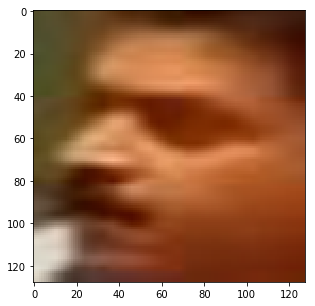

19904/19906 [============================>.] - ETA: 0sOriginal: MIDDLE Predicted: YOUNG


In [87]:
i = random.choice(train.index)
img_name = train.ID[i]
img_path = os.path.join(data_dir, 'Train', img_name)
img = imread(img_path).astype('float32')
#imshow(imresize(img, (128, 128)))
plt.imshow(imresize(img, (128, 128)))
plt.show()
pred = z.predict_classes(train_x)
print('Original:', train.Class[i], 'Predicted:', lb.inverse_transform(pred[i]))